<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%206%20Single-Phase-Fluid%20Flow%20in%20Porous%20Media/notebook/6_examples_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 6 Single-Phase-Fluid Flow in Porous Media (Part 2)**

Part 2 contains the remaining 3 of 6 solutions: the **Constant Terminal Pressure**, **Multirate solution** and **Multiple Pressure Solutions**. 

There are 6 simplified solutions OVERALL:
* Constant-Rate:
  * Bounded Cylindrical Reservoir (Chap 6.3)
  * Infinite Cylindrical Reservoir with Line-Source Well (Chap 6.4)
  * Cylindrical Reservoir with Constant Pressure at Outer Boundary (Chap 6.5)
* Constant-Pressure:
  * Bounded Cylindrical Reservoir (Chap 6.6)
* Multirate (Chap 6.7)
* Multiple Pressure (Chap 6.8)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://www.github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 498 (delta 52), reused 0 (delta 0), pack-reused 360
Receiving objects: 100% (498/498), 1.22 MiB | 20.78 MiB/s, done.
Resolving deltas: 100% (206/206), done.


## **Chap 6.6 Constant-Pressure Solutions (Bounded Cylindrical Reservoirs)**

Function: `solution_type_4`

Boundary conditions:
* No flow at the outer boundary of reservoir (`r = re`)
* Constant flowing pressure at wellbore (`pi = pf`)

Purpose: Calculate cumulative production and well rate profile over TIME

### Example 6.5 Calculation of Well Flow Rate with Constant Flowing Pressure

In [3]:
"Task. determine cumulative production (Q_D) and well rate (q_D) profile"

# known

poro = 0.2
k = 85 # in mD
rw = 0.5 # in ft
ct = 6E-06 # in psi^-1
pi = 2100 # in psia
Bo = 1.33 # in RB/STB
h = 45 # in ft
re = 2000 # in ft
mu_oil = 4 # in cp
pwf = 1500 # wellbore flowing pressure, constant, in psia

# conversion: NONE, all units already in oilfield 

# finite acting condition
r_eD = re / rw
t_Dw_finite = 0.25 * (r_eD)**2
t_finite_acting = (poro * mu_oil * ct * (rw**2) * t_Dw_finite) / (0.0002637 * k) # result in hour
print("Time when flow behaves finite acting:", t_finite_acting, "hours")

Time when flow behaves finite acting: 214.14709228401261 hours


Determine **cumulative production** `Q` profile, in STB.

In [4]:
time = np.linspace(1, 1000, 100)

t_D_arr = []
Q_D_arr = []
Q_arr = []

for i in range(len(time)):
  if time[i] < t_finite_acting:
    t_Dw = (0.0002637 * k * time[i]) / (poro * mu_oil * ct * (rw**2))
    t_D_arr.append(float(t_Dw))
    # flow behaves infinite acting
    # use Edwardson approximation formula    
    if t_Dw > 0.01 and t_Dw <= 200:
      # use Eq 6.36
      Q_D = ((1.12838 * np.sqrt(t_Dw)) + (1.19328 * t_Dw) + (0.269872 * t_Dw * np.sqrt(t_Dw)) + (0.00855294 * (t_Dw**2))) / (1 + (0.616599 * np.sqrt(t_Dw)) + (0.0413998 * t_Dw))
      Q_D_arr.append(float(Q_D))
    if t_Dw > 200 and t_Dw < t_Dw_finite:
      # use Eq 6.37
      Q_D = ((2.02566 * t_Dw) - 4.29881) / np.log(t_Dw)
      Q_D_arr.append(float(Q_D))
  if time[i] >= t_finite_acting:
    t_Dw = (0.000263 * k * time[i]) / (poro * mu_oil * ct * (rw**2))
    t_D_arr.append(float(t_Dw))
    # flow behaves finite acting
    # use Edwardson approximation formula (Eq 6.38)
    Q_D = 0.5 * ((r_eD**2) - 1)
    Q_D_arr.append(float(Q_D))
  
  # convert Q_D to Q using Eq 6.33
  Q = (Q_D * 1.119 * poro * ct * h * (rw**2) * (pi - pwf)) / Bo
  Q_arr.append(float(Q))

# print(Q_D_arr)

Q = pd.DataFrame({"Time(hour)": time, "t_D": t_D_arr, "Q_D": Q_D_arr, "Q(STB)": Q_arr})
Q.head(20)

,Time(hour),t_D,Q_D,Q(STB)
0,1.000000,1.867875e+04,3846.665225,26.214879
1,11.090909,2.071643e+05,34280.777847,233.622212
2,21.181818,3.956499e+05,62184.212378,423.783070
3,31.272727,5.841355e+05,89114.737993,607.313589
4,41.363636,7.726210e+05,115438.549128,786.709373
5,51.454545,9.611066e+05,141325.014921,963.124664
6,61.545455,1.149592e+06,166871.535088,1137.223238
7,71.636364,1.338078e+06,192141.156952,1309.434761
8,81.727273,1.526563e+06,217177.897084,1480.059204
9,91.818182,1.715049e+06,242014.153082,1649.317355


Determine **well rate** `q` profile, in STB.

Note: `q` for finite acting has not been solved. It uses Table A-4

In [5]:
time = np.linspace(1, 1000, 100)

t_D_arr = []
q_D_arr = []
q_arr = []

for i in range(len(time)):
  if time[i] < t_finite_acting:
    t_Dw = (0.0002637 * k * time[i]) / (poro * mu_oil * ct * (rw**2))
    t_D_arr.append(float(t_Dw))
    # flow behaves infinite acting
    # use Edwardson approximation formula Eq    
    if t_Dw > 0.01 and t_Dw <= 200:
        # use Eq 6.42
        q_D = (26.7544 + (45.5537 * np.sqrt(t_Dw)) + (13.3813 * t_Dw) + (0.492949 * t_Dw * np.sqrt(t_Dw))) / ((47.4210 * np.sqrt(t_Dw)) + (35.5372 * t_Dw) + (2.60967 * t_Dw * np.sqrt(t_Dw)))
        q_D_arr.append(float(q_D))
    if t_Dw > 200 and t_Dw < t_Dw_finite:
        # use Eq 6.43
        q_D = ((2.02623 * t_Dw * (np.log(t_Dw) - 1)) + 3.90086) / (t_Dw * ((np.log(t_Dw))**2))
        q_D_arr.append(float(q_D))
  if time[i] >= t_finite_acting:
      t_Dw = (0.000263 * k * time[i]) / (poro * mu_oil * ct * (rw**2))
      t_D_arr.append(float(t_Dw))
      # flow behaves finite acting

      # use Table A-4, hasn't been solved, so for now it is NaN. just wait until it has been solved :)
      q_D = float('nan')
      q_D_arr.append(float(q_D))
    
  # convert Q_D to Q using Eq 6.33
  q = (q_D * 0.007082 * k * h * (pi - pwf)) / (Bo * mu_oil)
  q_arr.append(float(q))

result = pd.DataFrame({"Time(hour)": time, "t_D": t_D_arr, "Q_D": Q_D_arr, "Q(STB)": Q_arr, "q_D": q_D_arr, "q(STB/d)": q_arr})
result.head(30)

,Time(hour),t_D,Q_D,Q(STB),q_D,q(STB/d)
0,1.000000,1.867875e+04,3.846665e+03,26.214879,0.185074,565.422466
1,11.090909,2.071643e+05,3.428078e+04,233.622212,0.152003,464.385428
2,21.181818,3.956499e+05,6.218421e+04,423.783070,0.145017,443.041945
3,31.272727,5.841355e+05,8.911474e+04,607.313589,0.141109,431.103449
4,41.363636,7.726210e+05,1.154385e+05,786.709373,0.138430,422.920242
5,51.454545,9.611066e+05,1.413250e+05,963.124664,0.136409,416.743712
6,61.545455,1.149592e+06,1.668715e+05,1137.223238,0.134793,411.809038
7,71.636364,1.338078e+06,1.921412e+05,1309.434761,0.133454,407.715290
8,81.727273,1.526563e+06,2.171779e+05,1480.059204,0.132312,404.226917
9,91.818182,1.715049e+06,2.420142e+05,1649.317355,0.131319,401.194154


Plot the **semilog plot** of `q` vs `log(t)` and `log(q)` vs `t`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


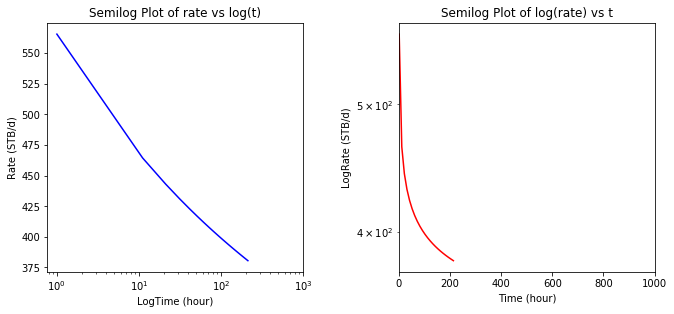

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.semilogx(time, q_arr, 'b')
plt.title('Semilog Plot of rate vs log(t)')
plt.xlabel('LogTime (hour)'); plt.ylabel('Rate (STB/d)')
plt.xlim(0, 1000)

plt.subplot(1,2,2)
plt.semilogy(time, q_arr, 'r')
plt.title('Semilog Plot of log(rate) vs t')
plt.xlabel('Time (hour)'); plt.ylabel('LogRate (STB/d)')
plt.xlim(0, 1000)

plt.tight_layout(pad=3.0) # set distance between two plots

## **Chap 6.7.1 Multirate Solutions**

Function: `multirate_solution`

Calculation:
* Considering multirate wells (well operating with changing rate `q`) as multiple single wells with different rate **added to one another after the other**, at time `t_j-1`

Purpose: Calculate PRESSURE inside the wellbore that operates with CHANGING RATES

(0, 30)

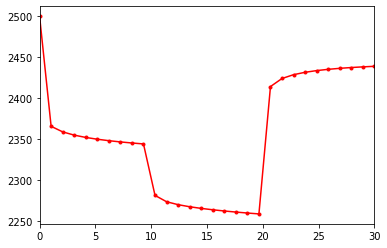

In [87]:
"Task. determine and plot well flowing pressure with changing rates for 30 hours"

# known

poro = 0.15
ct = 12E-06 # total compressibility, in psi^-1
k = 600 # in mD
rw = 4 # in inch
h = 32 # in ft
mu_oil = 2 # oil viscosity, in cP
pi = 2500 # initial pressure, in psia
Bo = 1.333 # oil FVF, in RB/STB
# flow behaves infinite for 30 hours
re = np.Infinity # infinite reservoir

# conversion
rw = rw * 0.08333 # convert from in to ft

# rate changes
t_minus = [10, 20]  # time when rate changes occur. the first change occur at t=10 hour, second change
                    # occur at t=20 hour
q = [1000, 1500, 300] # rate 1 at 0 <= t < 10 hour, rate 2 at 10 <= t < 20 hour, rate 3 at 20 <= t <= 30 hour

# calculate rate changes
delta_q = [j-i for i, j in zip(q[:-1], q[1:])] # change of rate: q2-q1, q3-q2, etc.

time = np.linspace(0, 30, 30) # in hour

P_wellbore_arr = []

for i in range(len(time)):
  if time[i] == 0:
    P_wellbore = pi
    P_wellbore_arr.append(float(P_wellbore))
  if time[i] != 0:
    if time[i] <= t_minus[0]:
      # time at the first rate 1000 stb/d, condition hasn't reached multireate yet
      t_Dw = (0.000263 * k * time[i]) / (poro * mu_oil * ct * (rw**2))
      # because flow is infinite, calculate infinite p using Eq 6.20
      if t_Dw > 100:
        # Eq 6.20 is valid
        p_D = 0.5 * (((np.log(t_Dw)) + 0.80907)) # Eq 6.20
        # p_D_array.append(float(p_D))

        # re-arranging Eq 6.15 to calculate P_wellbore
        P_wellbore = pi - ((p_D * q[0] * Bo * mu_oil) / (0.007082 * k * h))
        P_wellbore_arr.append(float(P_wellbore))

      if t_Dw < 100:
        # Eq 6.20 is invalid
        p_D = "NaN"
        # p_D_array.append(float(p_D))

        P_wellbore = "NaN"
        P_wellbore_arr.append(float(P_wellbore))

    if time[i] > t_minus[0] and time[i] <= t_minus[1]:
      # time at the second rate 1500 stb/d 
      # calculate t_D_1 and t_D_2
      time_1 = time[i]
      time_2 = time[i] - t_minus[0]
      t_D_1 = (0.000263 * k * time_1) / (poro * mu_oil * ct * (rw**2))
      t_D_2 = (0.000263 * k * time_2) / (poro * mu_oil * ct * (rw**2))

      # calculate p_D_1 and p_D_2
      p_D_1 = 0.5 * (((np.log(t_D_1)) + 0.80907)) # Eq 6.20 
      p_D_2 = 0.5 * (((np.log(t_D_2)) + 0.80907))
      
      # calculate P_wellbore using Eq 6.44 (multirate solutions)
      delta_q_1 = q[0] # first rate minus 0 STB/d
      delta_q_2 = delta_q[0] # second rate minus first rate
      P_wellbore = pi - ((Bo * mu_oil / (0.007082 * k * h)) * (p_D_1 * delta_q_1 + p_D_2 * delta_q_2))
      P_wellbore_arr.append(float(P_wellbore))

    if time[i] > t_minus[1]:
      # time at the third rate 300 stb/d 
      # calculate t_D_1, t_D_2, t_D_3
      time_1 = time[i]
      time_2 = time[i] - t_minus[0]
      time_3 = time[i] - t_minus[1]
      t_D_1 = (0.000263 * k * time_1) / (poro * mu_oil * ct * (rw**2))
      t_D_2 = (0.000263 * k * time_2) / (poro * mu_oil * ct * (rw**2))
      t_D_3 = (0.000263 * k * time_3) / (poro * mu_oil * ct * (rw**2))

      # calculate p_D_1, p_D_2, p_D_3
      p_D_1 = 0.5 * (((np.log(t_D_1)) + 0.80907)) # Eq 6.20 
      p_D_2 = 0.5 * (((np.log(t_D_2)) + 0.80907))
      p_D_3 = 0.5 * (((np.log(t_D_3)) + 0.80907))

      # calculate P_wellbore using Eq 6.44 (multirate solutions)
      delta_q_1 = q[0] # first rate minus 0 STB/d
      delta_q_2 = delta_q[0] # second rate minus first rate
      delta_q_3 = delta_q[1] # third rate minus second rate
      P_wellbore = pi - ((Bo * mu_oil / (0.007082 * k * h)) * (p_D_1 * delta_q_1 + p_D_2 * delta_q_2 + p_D_3 * delta_q_3))
      P_wellbore_arr.append(float(P_wellbore))

plt.plot(time, P_wellbore_arr, '.-', color='r')
plt.xlim(0, 30)

In [99]:
### COPY

"Task. determine and plot well flowing pressure with changing rates for 30 hours"

# known

poro = 0.15
ct = 12E-06 # total compressibility, in psi^-1
k = 600 # in mD
rw = 4 # in inch
h = 32 # in ft
mu_oil = 2 # oil viscosity, in cP
pi = 2500 # initial pressure, in psia
Bo = 1.333 # oil FVF, in RB/STB
# flow behaves infinite for 30 hours
re = np.Infinity # infinite reservoir

# conversion
rw = rw * 0.08333 # convert from in to ft

# rate changes
t_minus = [10, 20]  # time when rate changes occur. the first change occur at t=10 hour, second change
                    # occur at t=20 hour
q = [1000, 1500, 300] # rate 1 at 0 <= t < 10 hour, rate 2 at 10 <= t < 20 hour, rate 3 at 20 <= t <= 30 hour

# calculate rate changes
delta_q = [j-i for i, j in zip(q[:-1], q[1:])] # change of rate: q2-q1, q3-q2, etc.

# define time
time = np.arange(0, 31, 1) # in hour

P_wellbore_arr = []
q_arr = []

for i in range(len(time)):
  if time[i] == 0:
    # initial time = 0 hour (before production)
    rate = q[0]
    q_arr.append(float(rate))

    P_wellbore = pi
    P_wellbore_arr.append(float(P_wellbore))

  if time[i] != 0:
    # initial time = 0 hour (before production)

    if time[i] <= t_minus[0]:
      # time at the first rate 1000 stb/d, condition hasn't reached multireate yet
      rate = q[0]
      q_arr.append(float(rate))

      t_Dw = (0.000263 * k * time[i]) / (poro * mu_oil * ct * (rw**2))
      # because flow is infinite, calculate infinite p using Eq 6.20

      if t_Dw > 100:
        # Eq 6.20 is valid
        p_D = 0.5 * (((np.log(t_Dw)) + 0.80907)) # Eq 6.20
        # p_D_array.append(float(p_D))

        # re-arranging Eq 6.15 to calculate P_wellbore
        P_wellbore = pi - ((p_D * q[0] * Bo * mu_oil) / (0.007082 * k * h))
        P_wellbore_arr.append(float(P_wellbore))

      if t_Dw < 100:
        # Eq 6.20 is invalid
        p_D = "NaN"
        # p_D_array.append(float(p_D))

        P_wellbore = "NaN"
        P_wellbore_arr.append(float(P_wellbore))

    if time[i] > t_minus[0] and time[i] <= t_minus[1]:
      # time at the second rate 1500 stb/d 
      rate = q[1]
      q_arr.append(float(rate))

      # calculate t_D_1 and t_D_2
      time_1 = time[i]
      time_2 = time[i] - t_minus[0]
      t_D_1 = (0.000263 * k * time_1) / (poro * mu_oil * ct * (rw**2))
      t_D_2 = (0.000263 * k * time_2) / (poro * mu_oil * ct * (rw**2))

      # calculate p_D_1 and p_D_2
      p_D_1 = 0.5 * (((np.log(t_D_1)) + 0.80907)) # Eq 6.20 
      p_D_2 = 0.5 * (((np.log(t_D_2)) + 0.80907))
      
      # calculate P_wellbore using Eq 6.44 (multirate solutions)
      delta_q_1 = q[0] # first rate minus 0 STB/d
      delta_q_2 = delta_q[0] # second rate minus first rate
      P_wellbore = pi - ((Bo * mu_oil / (0.007082 * k * h)) * (p_D_1 * delta_q_1 + p_D_2 * delta_q_2))
      P_wellbore_arr.append(float(P_wellbore))

    if time[i] > t_minus[1]:
      # time at the third rate 300 stb/d
      rate = q[2]
      q_arr.append(float(rate))
 
      # calculate t_D_1, t_D_2, t_D_3
      time_1 = time[i]
      time_2 = time[i] - t_minus[0]
      time_3 = time[i] - t_minus[1]
      t_D_1 = (0.000263 * k * time_1) / (poro * mu_oil * ct * (rw**2))
      t_D_2 = (0.000263 * k * time_2) / (poro * mu_oil * ct * (rw**2))
      t_D_3 = (0.000263 * k * time_3) / (poro * mu_oil * ct * (rw**2))

      # calculate p_D_1, p_D_2, p_D_3
      p_D_1 = 0.5 * (((np.log(t_D_1)) + 0.80907)) # Eq 6.20 
      p_D_2 = 0.5 * (((np.log(t_D_2)) + 0.80907))
      p_D_3 = 0.5 * (((np.log(t_D_3)) + 0.80907))

      # calculate P_wellbore using Eq 6.44 (multirate solutions)
      delta_q_1 = q[0] # first rate minus 0 STB/d
      delta_q_2 = delta_q[0] # second rate minus first rate
      delta_q_3 = delta_q[1] # third rate minus second rate
      P_wellbore = pi - ((Bo * mu_oil / (0.007082 * k * h)) * (p_D_1 * delta_q_1 + p_D_2 * delta_q_2 + p_D_3 * delta_q_3))
      P_wellbore_arr.append(float(P_wellbore))

multirate = pd.DataFrame({"Time(hour)": time, "WellRate(STB/d)": q_arr, "PressureWellbore(psia)": P_wellbore_arr})
multirate.head(21)

,Time(hour),WellRate(STB/d),PressureWellbore(psia)
0,0,1000.0,2500.000000
1,1,1000.0,2365.748251
2,2,1000.0,2358.953110
3,3,1000.0,2354.978207
4,4,1000.0,2352.157969
5,5,1000.0,2349.970422
6,6,1000.0,2348.183067
7,7,1000.0,2346.671879
8,8,1000.0,2345.362828
9,9,1000.0,2344.208164


(0, 30)

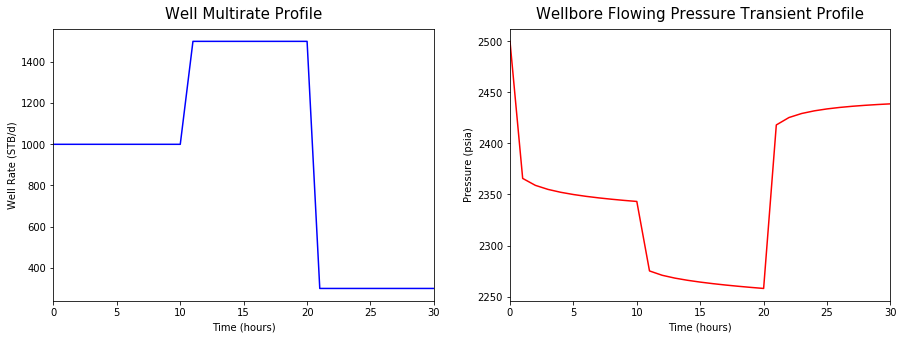

In [108]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(time, q_arr, color='blue')
plt.title('Well Multirate Profile', pad=10, size=15)
plt.xlabel('Time (hours)'); plt.ylabel('Well Rate (STB/d)')
plt.xlim(0, 30)

plt.subplot(1,2,2)
plt.plot(time, P_wellbore_arr, color='red')
plt.title('Wellbore Flowing Pressure Transient Profile', pad=10, size=15)
plt.xlabel('Time (hours)'); plt.ylabel('Pressure (psia)')
plt.xlim(0, 30)